# Proyek Analisis Data: Bike Sharing
- **Nama:** Sofiah Amanda
- **Email:** mc180d5x0323@student.devacademy.id
- **ID Dicoding:** 	MC180D5X0323

## Menentukan Pertanyaan Bisnis

- Berapa perbandingan pengguna terdaftar pada hari libur dan hari kerja?
- pada jam berapa orang-orang banyak menyewa sepeda?
- Bagaimana performa dari penyewaan sepeda selama beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Data Wrangling

### Gathering Data

In [132]:
#Load  tabel data day
day_path = "D://Coding Camp//Project Akhir - Analisis Data Menggunakan Python//Bike-sharing-dataset//day.csv"
day_df = pd.read_csv(day_path)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [133]:
#load tabel data hour
hour_path = "D://Coding Camp//Project Akhir - Analisis Data Menggunakan Python//Bike-sharing-dataset//hour.csv"
hour_df = pd.read_csv(hour_path)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada tabel day terdapat 17 fitur yang akan membantu untuk analisis data, sedangkan pada data hour terdapat 18
- Perbedaan dari data day dan hour adalah pada data hour memiliki kolom hr yang menunjukan perjam sedangkan data day tidak

### Assessing Data

In [134]:
#menilai kualitas dataframe day
day_df.info()

#melihat jumlah duplikasi data pada day_df
print("Jumlah duplikasi: ",day_df.duplicated().sum())

#melihat parameter statistik dataframe day
day_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [135]:
#menilai kualitas dataframe hour
hour_df.info()

#melihat jumlah duplicated data pada hour_df
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

#melihat parameter statistik hour_df
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi data:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- pada hour_df  dan day_df data sudah bersih dan bagus, tidak ada nilai 0, duplikasi data ataupun rentang data yang mencurigakan
- Namun pada kolom dteday keduanya dibaca sebagai object yang mana seharusnya adalah datetime

### Cleaning Data

In [136]:
#mengubah tipe data dteday pada day_df menjadi datetime
dteday_column_day = ['dteday']

for column in dteday_column_day:
    day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [137]:
#mengubah tipe data dteday pada hour_df menjadi datetime
dteday_column_hour = ['dteday']

for column in dteday_column_hour:
    hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Pada cleaning data yang dilakukan hanya mengubah kolom dteday di kedua dataframe menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore day_df

In [138]:
day_df.describe(include= "all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- jumlah hari yang ada selama 731 hari

Melihat hari apa pengguna terbanyak ada

In [139]:
day_df.groupby(by= 'weekday')['cnt'].sum().sort_values(ascending=False)

weekday
5    487790
4    485395
6    477807
3    473048
2    469109
1    455503
0    444027
Name: cnt, dtype: int64

*insight*:
dari hasil di atas, pengguna terbanyak terdapat pada hari jumat

Menghitung jumlah pengguna yang terdaftar

In [140]:
day_df['registered'].sum()

2672662

In [141]:
#menghitung jumlah pengguna yang tidak terdaftar
day_df['casual'].sum()

620017

In [142]:
day_df.groupby(by= 'weekday').agg({
    'registered' : 'sum',
    'casual': 'sum'
})

,registered,casual
weekday,,
0,303506,140521
1,384719,70784
2,411266,57843
3,415729,57319
4,423935,61460
5,409552,78238
6,323955,153852


In [143]:
day_df.groupby(by = 'workingday').agg({
    'registered' : 'sum',
    'casual' : 'sum'
})

,registered,casual
workingday,,
0,683537,316732
1,1989125,303285


* insight:
- dari pivot table di atas, untuk pengguna terdaftar lebih banyak menyewa sepeda pada hari kerja sedangkan untuk pengguna
casual penyewa terbanyak pada hari libur

In [144]:
df = day_df.groupby(by= 'season').agg({
    'registered': 'sum',
    'casual': 'sum'
    })

#membuat kolom total dari pivot table df untuk melihat jumlah pelanggan yang ada
df['total'] = df['registered'] + df['casual']
df.sort_values(by= 'total', ascending= False)

,registered,casual,total
season,,,
3,835038,226091,1061129
2,715067,203522,918589
4,711831,129782,841613
1,410726,60622,471348


* insight:
- dari data di atas, musim yang paling banyak penyewa sepedanya adalah musim fall atau gugur

## Eksplor data hour_df

In [145]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [ ]:
hour_df_table = hour_df.groupby('hr').agg({
    'registered' : 'sum',
    'casual' : 'sum'
})
hour_df_table
hour_df_table['total'] = hour_df_table['registered'] + hour_df_table['casual']
hour_df_table.sort_values(by= 'total', ascending= False)



,registered,casual,total
hr,,,
17,282640,54220,336860
18,265276,44496,309772
8,245240,15761,261001
16,173914,53834,227748
19,191284,35505,226789
13,132206,52713,184919
12,134696,49718,184414
15,128543,54606,183149
14,120563,55089,175652


In [147]:
hour_df_mean = hour_df.groupby('hr').agg({
    'registered' : 'mean',
    'casual' : 'mean'
})

hour_df_mean['total'] = hour_df_mean['registered'] + hour_df_mean['casual']
hour_df_mean.sort_values(by= 'total', ascending= False)

,registered,casual,total
hr,,,
17,387.178082,74.273973,461.452055
18,364.390110,61.120879,425.510989
8,337.331499,21.679505,359.011004
16,238.238356,73.745205,311.983562
19,262.752747,48.770604,311.523352
13,181.352538,72.308642,253.661180
12,185.021978,68.293956,253.315934
15,176.327846,74.905350,251.233196
14,165.381344,75.567901,240.949246


* insight
- dari data di atas, menunjukkan pada jam 17 merupakan jam yang paling banyak memakai penyewaan sepeda

## Visualization & Explanatory Analysis

* membuat perbandingan penggunaan sepeda antara casual dan registered

### Pertanyaan 1: Bagaimana perbandingan pengguna terdaftar pada hari libur dan hari kerja? 

## grafik jumlah pengguna terdaftar dan casual pada hari kerja dan hari libur

In [198]:
df_working = day_df.groupby(by = 'workingday').agg({
        'casual' : 'sum'
    })
df_working

df_working_registered = day_df.groupby(by= 'workingday').agg({
    'registered': 'sum'
})
df_working_registered

,registered
workingday,
0,683537
1,1989125


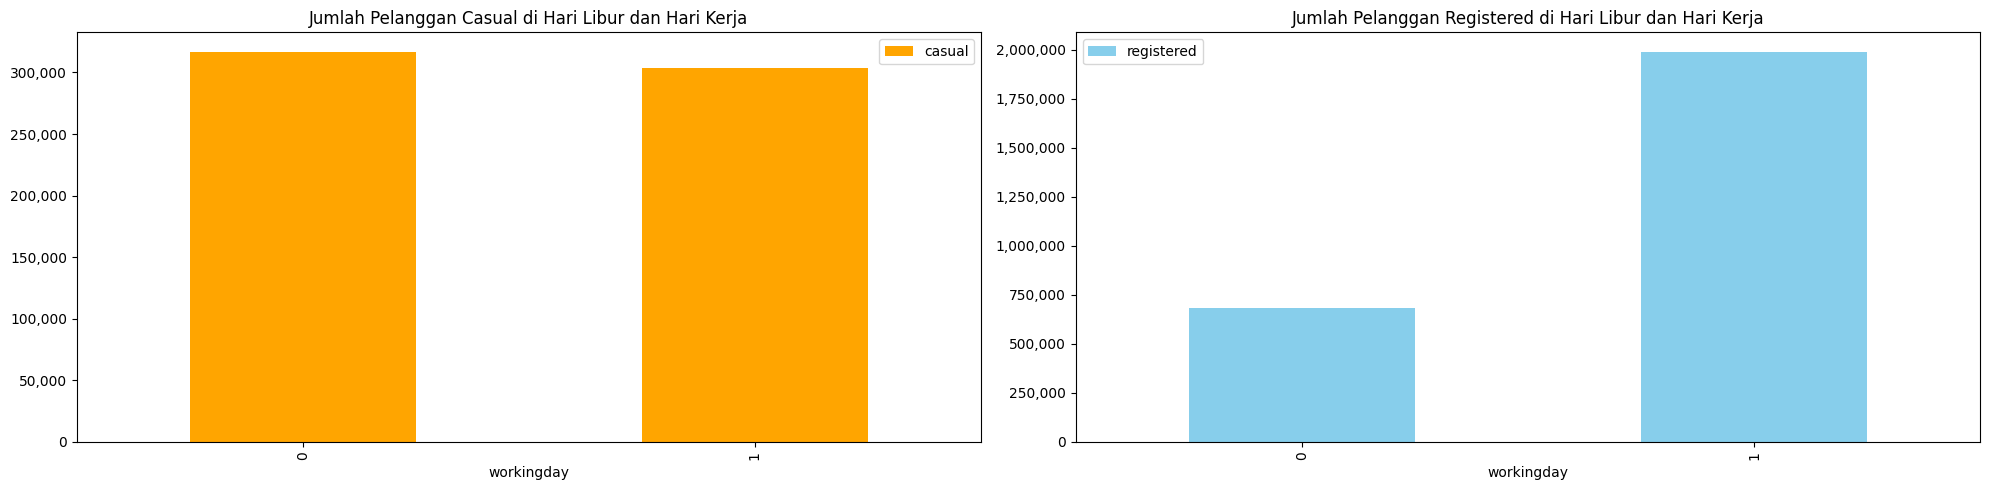

In [199]:
fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize= (20,5))

ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

df_working.plot(kind= 'bar', ax= ax[0], color= 'orange')
ax[0].set_title("Jumlah Pelanggan Casual di Hari Libur dan Hari Kerja")

df_working_registered.plot(kind= 'bar', ax= ax[1], color= 'skyblue')
ax[1].set_title("Jumlah Pelanggan Registered di Hari Libur dan Hari Kerja")
plt.tight_layout()
plt.show()

### Pertanyaan 2: Pada jam berapa orang-orang banyak menyewa sepeda?

In [166]:
hour_df_table = hour_df.groupby('hr').agg({
    'registered' : 'sum',
    'casual' : 'sum'
})

hour_df_table['total'] = hour_df_table['registered'] + hour_df_table['casual']
hour_df_table.sort_values(by= 'total', ascending= False)

hour_df_table.groupby('hr').agg({
    'total': 'sum'
}).sort_values(by= 'total', ascending= False)

,total
hr,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


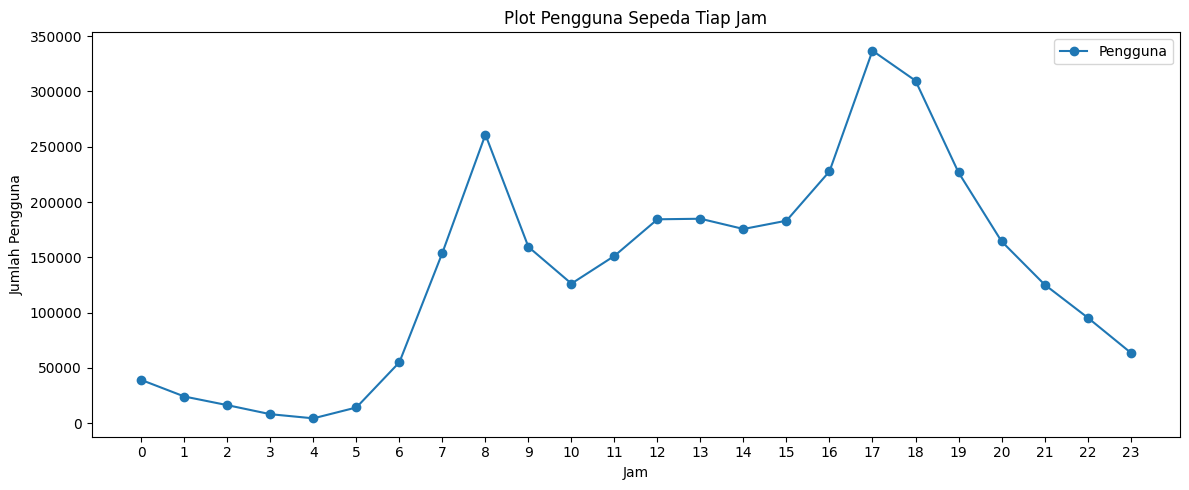

In [170]:
plt.figure(figsize= (12,5))
plt.plot(hour_df_table['total'], label= 'Pengguna', marker= 'o')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.title('Plot Pengguna Sepeda Tiap Jam')
plt.xticks(ticks= range(0, 24, 1))
plt.legend()
plt.tight_layout()
plt.show()

## Pertanyaan 3: Bagaimana performa dari penyewaan sepeda selama beberapa bulan terakhir?

* Membuat Tabel dan grafik untuk melihat performa tiap bulan

In [173]:
day_df_table = day_df.groupby('mnth').agg({
    'cnt' : 'sum'
})

day_df_table.sort_values(by= 'cnt', ascending= False)

,cnt
mnth,
8,351194
6,346342
9,345991
7,344948
5,331686
10,322352
4,269094
11,254831
3,228920


* membuat grafik untuk melihat performa tiap bulan

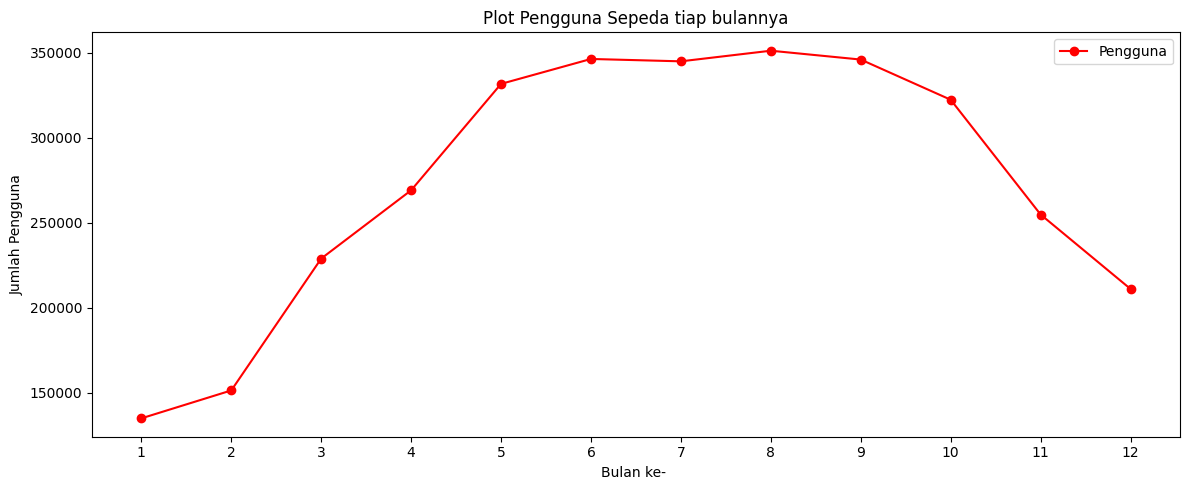

In [179]:
plt.figure(figsize= (12,5))
plt.plot(day_df_table['cnt'], label= 'Pengguna', marker= 'o', color= 'r')
plt.xlabel('Bulan ke- ')
plt.ylabel('Jumlah Pengguna')
plt.title('Plot Pengguna Sepeda tiap bulannya')
plt.xticks(ticks= range(1, 13, 1))
plt.legend()
plt.tight_layout()
plt.show()

**Insight:**
- Perilaku antara pengguna registered dan casual sangat berbeda, pada pengguna casual mereka lebih banyak menyewa pada hari libur sedangkan pada pengguna registered menyewa sepeda pada hari kerja
- Terdapat jam-jam pada satu hari yang mana biasanya ramai, puncaknya pada jam 5 sore kemudian menurun saat hari mulai malam
- di pertengahan tahun dari bulan juli - september lebih banyak pengguna yang menyewa sepeda, terlebih puncaknya pada bulan agustus

In [203]:
all_data = hour_df.merge(day_df[['dteday', 'casual', 'registered', 'cnt']],
                        on='dteday',
                        suffixes=('_hour', '_day'))

all_data.to_csv('all_data.csv', index= False)

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   season           17379 non-null  int64         
 3   yr               17379 non-null  int64         
 4   mnth             17379 non-null  int64         
 5   hr               17379 non-null  int64         
 6   holiday          17379 non-null  int64         
 7   weekday          17379 non-null  int64         
 8   workingday       17379 non-null  int64         
 9   weathersit       17379 non-null  int64         
 10  temp             17379 non-null  float64       
 11  atemp            17379 non-null  float64       
 12  hum              17379 non-null  float64       
 13  windspeed        17379 non-null  float64       
 14  casual_hour      17379 non-null  int64

## Analisis Lanjutan (Opsional)

## Conclusion

- Diperlukan stok serta spot penyewaan lebih banyak pada hari kerja dan prioritaskan untuk pengguna terdaftar di hari kerja
- Menjelang sore hari dibutuhkan sepeda lebih banyak atau perlu informasi sisa sepeda yang ada karena dari sore menuju malam merupakan peak hour
- diperlukannya promosi lebih agar awal tahun dan akhir tahun angka penyewa bisa tetap tinggi